# Credit Card Fraud Detection
```
약 28만건의 신용카드 거래 데이터 중에서 이상거래(Fraud)를 감지해내는 프로그램
```

# Import
- 필요한 라이브러리 및 데이터 셋을 불러옵니다.

## Module Import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import tensorflow as tf 

from sklearn.preprocessing import StandardScaler, MinMaxScaler 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Load
- Pandas로 csv파일을 불러온 뒤, 데이터의 형태 및 df라는 변수에 데이터가 제대로 저장되었는지 확인해줍니다. 

In [ ]:
df = pd.read_csv('/content/drive/My Drive/test/creditcard.csv', delimiter=',', dtype=np.float32)
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0.0


# Data check
## Missing value check

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float32
 1   V1      284807 non-null  float32
 2   V2      284807 non-null  float32
 3   V3      284807 non-null  float32
 4   V4      284807 non-null  float32
 5   V5      284807 non-null  float32
 6   V6      284807 non-null  float32
 7   V7      284807 non-null  float32
 8   V8      284807 non-null  float32
 9   V9      284807 non-null  float32
 10  V10     284807 non-null  float32
 11  V11     284807 non-null  float32
 12  V12     284807 non-null  float32
 13  V13     284807 non-null  float32
 14  V14     284807 non-null  float32
 15  V15     284807 non-null  float32
 16  V16     284807 non-null  float32
 17  V17     284807 non-null  float32
 18  V18     284807 non-null  float32
 19  V19     284807 non-null  float32
 20  V20     284807 non-null  float32
 21  V21     28

```
각 변수에 대해서 missing value가 존재하는지 확인해본 결과, 이 데이터에서는 missing value가 존재하지 않음을 확인할 수 있습니다. 
만일 missing value가 존재할 경우, count칼럼에 missing value의 숫자가 기록됩니다. 

또한 데이터 타입과 메모리 사용량도 확인 가능합니다. 
```

In [ ]:
df.isnull().sum() /df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

```
만약 missing value가 존재한다면, 몇개의 missing value가 존재하는지 확인해 줍니다. 
위와 같이 df의 row의 개수로 나누어주면 각 col의 missing value의 비율 또한 알 수 있습니다.

missing value의 존재를 확인했다면, 해당 missing value가 존재하는 row를 삭제하거나 적절한 값으로 채워줍니다. 
여기서 적절한 값을 계산하는 방법은 여러가지가 존재할 수 있으며, 가장 간단하게는 mean이나 median을 사용할 수 있습니다. 
```

## Correlation Visualize
```
Feature들 사이의 상관관계를 확인해줍니다. 
Credit card 데이터의 경우에는 이미 한번 PCA를 거친 데이터이므로 Feature들 사이의 상관관계가 매우 낮게 나옵니다. 
그러나 만약 feature들 간의 상관관계가 높게 나오는 상황을 마주하게 된다면 VIF를 통해서 다중공선성을 확인해주는 것이 좋습니다.
```

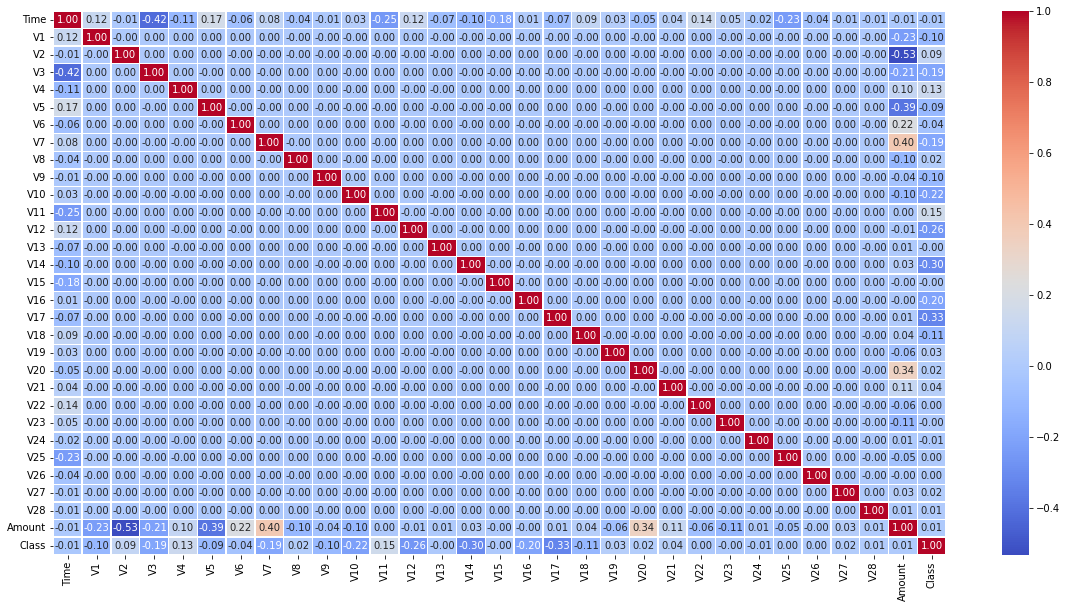

In [ ]:
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidth=0.3, fmt='0.2f', ax=ax, cmap='coolwarm')

# EDA (Exploaratory Data Analysis) 
```
데이터의 전체적인 구조를 살펴봅니다.
```

In [ ]:
count_classes = pd.value_counts(df['Class'], sort=True)
print(count_classes.head())
print()

print(df['Class'].value_counts(normalize=True))

0.0    284315
1.0       492
Name: Class, dtype: int64

0.0    0.998273
1.0    0.001727
Name: Class, dtype: float64


```
0.0 : 정상거래, 1.0: 이상거래 

정상거래는 28만4315건, 이상거래는 492건이 존재합니다. 
전체 데이터셋에서 오직 0.0017%가 이상거래이므로 심각한 imbalance가 존재하는 데이터셋임을 파악할 수 있습니다. 

그러므로 일반적인 상황에서 주로 사용되는 Accuracy를 사용해서 모델의 Performance를 측정하기 어렵다는 결론이 도출됩니다. 
따라서 모델을 설계할 때 Precision, Recall 그리고 F1 Score를 사용하도록 디자인 해줍니다. 
```

Text(0.5, 1.0, 'Transaction Class Distribution')

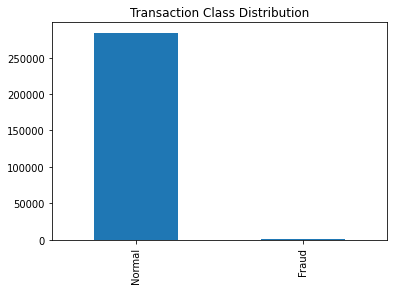

In [ ]:
labels=['Normal', 'Fraud']
plt.figure(figsize=(6,4))
count_classes.plot(kind='bar')
plt.xticks(range(2), labels)
plt.title('Transaction Class Distribution')

```
Data imbalance가 얼마나 심한지 시각화를 통해 다시 확인해봅니다. 
```

In [ ]:
df.drop(columns='Time', inplace=True)
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0


```
Time이라는 feature는 단순히 신용카드가 이루어진 순서를 기록한 것이기 때문에 분석에 큰 도움이 되지 않습니다.
그러므로 데이터 테이블에서 배제시켜 줍니다.
```

In [ ]:
x_data = df.iloc[:,0:-1].values 
y_data = df.iloc[:,[-1]].values 

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

print(x_data.shape, y_data.shape)

(284807, 29) (284807, 1)


```
Feature들로 이루어진 x_data와, label을 나타내는 y_data로 원본 데이터를 분리시켜 줍니다. 
분리된 데이터는 앞으로 계산을 해주어야 하기 때문에 동일한 타입의 실수형 데이터로 저장합니다.
```

# Data Preprocessing - Normalize

In [ ]:
scaler = MinMaxScaler()
x_data = scaler.fit_transform(x_data)
print(x_data)

[[9.3519241e-01 7.6649040e-01 8.8136494e-01 ... 4.1897613e-01
  3.1269664e-01 5.8237929e-03]
 [9.7854203e-01 7.7006662e-01 8.4029853e-01 ... 4.1634512e-01
  3.1342265e-01 1.0470528e-04]
 [9.3521708e-01 7.5311762e-01 8.6814088e-01 ... 4.1548926e-01
  3.1191131e-01 1.4738923e-02]
 ...
 [9.9090487e-01 7.6407969e-01 7.8110206e-01 ... 4.1659316e-01
  3.1258485e-01 2.6421540e-03]
 [9.5420909e-01 7.7285570e-01 8.4958714e-01 ... 4.1851953e-01
  3.1524515e-01 3.8923896e-04]
 [9.4923186e-01 7.6525640e-01 8.4960151e-01 ... 4.1646636e-01
  3.1340083e-01 8.4464857e-03]]


```
데이터의 scale에 따라서 결과가 왜곡되는 상황을 방지하기 위해 MinMaxScaler를 통해서 모든 데이터가 0 ~ 1 사이의 값을 지니도록 조정해 줍니다.
```

# Logistic Regression
## Parameter Initilization

In [ ]:
tf.random.set_seed(22) 

W = tf.Variable(tf.random.normal([29,1], mean=0.0))
b = tf.Variable(tf.random.normal([1], mean=0.0))

```
W: 앞에는 input dimension, 뒤에는 output dimension으로 설정해야 합니다.
b: output dimension과 동일하게 설정합니다. 
```

## Hypothesis Define

In [ ]:
def hypothesis(x):
    z = tf.matmul(x,W) + b
    sigmoid = 1 / (1+tf.exp(-z))
    return sigmoid

```
Feature과 label 사이의 관계를 정의하는 부분입니다. 
여기서는 이진분류 문제에 주로 사용되는 Logistic Regression을 hypothesis로 설정해 주었습니다. 
```

## Cost function Define (Loss function)

In [ ]:
def cost_function(H, Y):
    cost = -tf.reduce_mean( Y * tf.math.log(H) + (1-Y)*tf.math.log(1-H))
    return cost 

```
여기서는 마찬가지로 이진분류에서 주로 사용되는 Cross Entropy를 cost function으로 설정해 주었습니다. 
```

## Metric Define

In [ ]:
def accuracy(hypo, label):
    predicted = tf.cast( hypo > 0.5, dtype= tf.float32)
    accuracyd = tf.reduce_mean(tf.cast(tf.equal(predicted, label), dtype=tf.float32))
    return accuracyd 

```
실제 모델의 퍼포먼스를 측정하는 기준을 설정합니다. 
일반적으로 가장 많이 쓰이는 Accuracy를 우선은 설정해주었습니다. 
```

## Hyper-parameter Setting

In [ ]:
learning_rate = 0.0001
optimizer = tf.optimizers.SGD(learning_rate)

```
학습을 진행하기 위해서 우리가 지정해 주어야 하는 변수를 Hyper-parameter라고 합니다.
대표적인 하이퍼 파라미터는 learning rate, optimizer, epochs, actvation function, number of layer, number of neuron 같은 것들이 존재합니다. 
지금은 딥러닝 모델을 사용하는 것이 아니기 때문에 Logistic Regression 학습에 필요한 learning rate와 optimizer만 설정해 주었습니다.
```

## Training

In [ ]:
for step in range(2022):
    with tf.GradientTape() as g: 
        pred = hypothesis(x_data)
        cost = cost_function(pred, y_data)
        gradients = g.gradient(cost, [W,b])
    optimizer.apply_gradients(zip(gradients, [W,b]))
    
    if step % 200 == 0:
        print(f"step: {step}, loss: {cost.numpy()}")
        
w_hat = W.numpy()
b_hat = b.numpy()

step: 0, loss: 0.015813227742910385
step: 200, loss: 0.01580575853586197
step: 400, loss: 0.015798307955265045
step: 600, loss: 0.015790868550539017
step: 800, loss: 0.015783440321683884
step: 1000, loss: 0.015776026993989944
step: 1200, loss: 0.015768621116876602
step: 1400, loss: 0.015761228278279305
step: 1600, loss: 0.0157538540661335
step: 1800, loss: 0.015746500343084335
step: 2000, loss: 0.015739159658551216


```
Backpropagation을 통해서 최적의 W와 b를계속해서 업데이트 해줍니다.
최종석으로 업데이트된 값을 w_hat과 b_hat에 저장합니다.
```

## Performance 
### Accurcay

In [ ]:
acc = accuracy(hypothesis(x_data), y_data).numpy()
print(f'Accuracy: {acc}')

Accuracy: 0.9982725381851196


```
99.83%의 상당히 높은 Accuracy를 보입니다.
그러나 위에서 살펴본 바에 의하면 data set이 매우 inbalance 했으므로, Accuracy는 모델을 평가하는 적절한 metric가 될 수 없습니다. 
그러므로 Precision과 Recall의 측면에서 모델을 다시 한번 평가해 봅니다.
```

### Precision, Recall, F1 score
- Precision : 모델이 True라고 분류한 것 중에서 실제 True가 차지하는 비중 
- Recall : 실제 True 중에서 모델이 True라고 분류한 데이터 비중 
- F1 score : Precision과 Recall의 조화평균 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score

In [ ]:
predicted_x = tf.cast(hypothesis(x_data)> 0.5, dtype= tf.float32)

In [ ]:
print('Accuracy = ', accuracy_score(predicted_x, y_data))
print('Report = \n', classification_report(predicted_x, y_data))

Accuracy =  0.9982725143693799


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    284807
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


```
대안적인 metric의 관점에서 Logistic Regression 모델을 평가해 봤을 때, Fraud transaction을 거의 잡아내지 못하는 것을 알 수 있습니다. 
그러므로 다른 모델을 통해서 접근해야 된다는 결론을 낼 수 있습니다. 
```

# Neural Networks
```
이번엔 인공신경망 모델을 통해 Fraud transaction을 잡아보고자 합니다.
```
## Module Import

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split 
from keras import optimizers, metrics, callbacks

## Dataset Split
```
학습에 사용할 training set과 퍼포먼스 측정에 사용할 test set을 나누어주는데, 데이터가 많으므로 8:2의 비율로 나누어 줍니다. 
```

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size=0.20, random_state=22)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(227845, 29) (227845, 1)
(56962, 29) (56962, 1)


## Model build
```
적절한 ANN 모델을 만들어 줍니다. 

Input Layer에는 항상 input data의 dimension에 따라 그에 맞는 input_shape을 지정 해주어야합니다. 
Hidden Layer 사이의 activation function으로는 ReLu를 기본적으로 사용했으며, 이진 분류의 문제이므로 Output Layer에는 activation function을 sigmoid로 지정했습니다.

Hidden Layer마다 drop out을 적용해서 overfitting을 방지하도록 하고, Batch normalization도 적용해줌으로써 학습이 보다 빠르고 안정적으로 진행되게끔 유도합니다.

Hidden Layer를 지날수록 점차 neuron의 수를 줄게하여 정보가 압축되도록 설계되었고, Output Layer 직전의 Hidden Layer에서는 activation function으로 softmax를 사용했습니다.
```

In [ ]:
model = Sequential([
    Dense(400, activation='relu', input_dim=29),
    BatchNormalization(),
    Dropout(0.5),
    Dense(200, activation='relu'), 
    BatchNormalization(),
    Dropout(0.4),
    Dense(100, activation='relu'), 
    BatchNormalization(),
    Dropout(0.4),
    Dense(50, activation='relu'), 
    BatchNormalization(),
    Dropout(0.4),
    Dense(24, activation='relu'), 
    BatchNormalization(),
    Dropout(0.5),
    Dense(12, activation='relu'), 
    BatchNormalization(),
    Dropout(0.5),
    Dense(6, activation='softmax'), 
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               12000     
                                                                 
 batch_normalization (BatchN  (None, 400)              1600      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 batch_normalization_1 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 200)               0

## Model compile

In [ ]:
model.compile(optimizer = optimizers.Adam(1e-4),
             loss = 'binary_crossentropy',
             metrics = [metrics.Recall(name='recall'),
                        metrics.Precision(name='precision')])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

```
모델을 학습하는데에 필요한 하이퍼 파라미터들을 지정해줍니다. 
SGD의 단점을 보안한 adam를 optimizer로, 
loss function으로는 이진분류에 적합한 binary_crossentropy로 설정했습니다. 
또한, Data imbalance가 심하므로 성능평가로는 accuracy 대신 recall, precision, f_score 등을 사용해줍니다. 
```

## Training

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state=22)

print(x_train.shape, y_train.shape)
print(x_validate.shape, y_validate.shape)
print(x_test.shape, y_test.shape)

(182276, 29) (182276, 1)
(45569, 29) (45569, 1)
(56962, 29) (56962, 1)


```
EarlyStopping 사용을 위해 validate set을 만들어주었습니다. 
해당 셋은 기존 training set에서 다시 8:2로 나누었습니다.
```

In [ ]:
checkpoint_cd = ModelCheckpoint('best_model.h5')
earlystopping_cd = EarlyStopping(patience = 200, monitor='val_loss', mode='min')

```
200번 이상 val_loss 값에 개선이 없을 경우, 종료 시켜줄 예정입니다.
또한, val_loss는 적을 수록 좋은 값이므로 mode를 min으로 설정해줍니다.
```

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_validate, y_validate), batch_size = 64000, epochs = 10000, verbose=0,
                    callbacks = [checkpoint_cd, earlystopping_cd])

score = model.evaluate(x_test, y_test)
print(score)

1781/1781 [==============================] - 7s 4ms/step - loss: 0.0036 - recall: 0.6559 - precision: 1.0000
[0.0036312018055468798, 0.6559139490127563, 1.0]


### Training Visualization

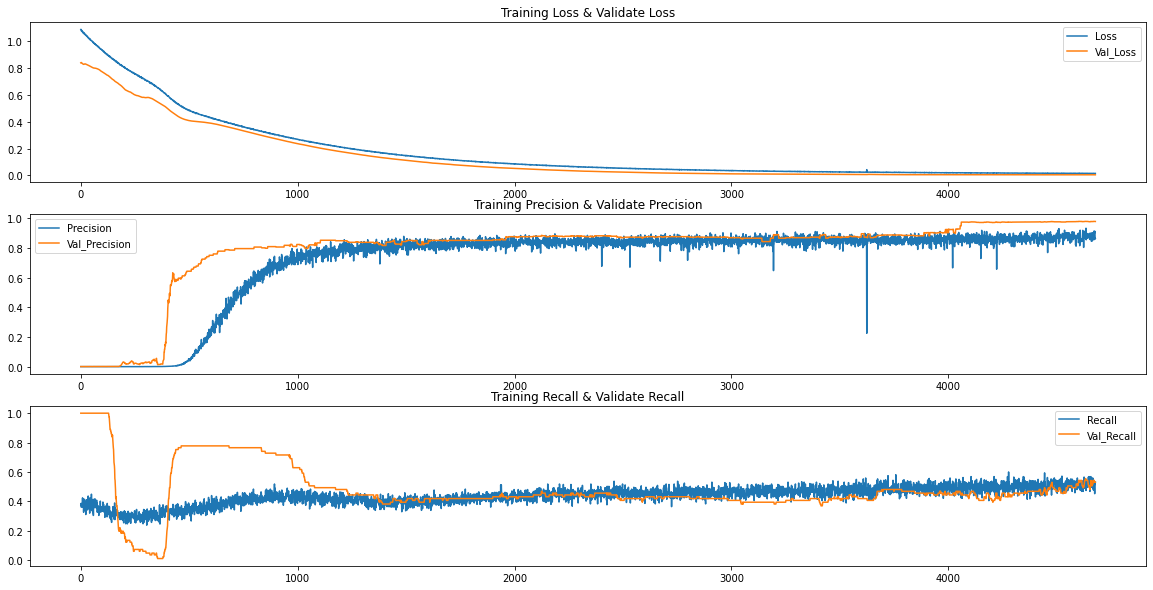

In [ ]:
plt.figure(figsize = (20,10))

plt.subplot(311)
plt.plot(history.history["loss"], label = "Loss")
plt.plot(history.history["val_loss"], label = "Val_Loss")
plt.title("Training Loss & Validate Loss")
plt.legend()

plt.subplot(312)
plt.plot(history.history["precision"], label = "Precision")
plt.plot(history.history["val_precision"], label = "Val_Precision")
plt.title("Training Precision & Validate Precision")
plt.legend()

plt.subplot(313)
plt.plot(history.history["recall"], label = "Recall")
plt.plot(history.history["val_recall"], label = "Val_Recall")
plt.title("Training Recall & Validate Recall")
plt.legend()

## ANN Performance
### Precision, Recall, F1 score

In [ ]:
predicted_ANN = tf.cast( model.predict(x_test) > 0.5, dtype = tf.float32)
print("Report = \n", classification_report(predicted_ANN, y_test))

1781/1781 [==============================] - 4s 2ms/step
Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56901
         1.0       0.66      1.00      0.79        61

    accuracy                           1.00     56962
   macro avg       0.83      1.00      0.90     56962
weighted avg       1.00      1.00      1.00     56962



```
회사의 입장에서보면, 신용카드의 부정 사용인데 부정 사용이 아니라고 예측하면 더 손해가 크다고 생각해 
Recall의 점수의 중요도가 더 높다고 생각했습니다. 
고로 Recall과 F1 score을 높이는 것을 목표로 모델링 했습니다. 

그 결과, Recall은 1.0 , f1-score는 0.79로 앞전의 Logistic Regression 보다 훨씬 성능이 좋음을 알 수 있습니다.
```

# Other Machine Learning Method
```
다른 Machine learning method는 EarlyStopping을 사용하지 않으므로 validation set을 없애고 오로지 training set과 test set으로만 나눕니다.
```

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size=0.20, random_state=22)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(227845, 29) (227845, 1)
(56962, 29) (56962, 1)


## bagging
```
여러개의 decision tree를 그리게 되면, overfitting 현상을 줄여줄 수 있으므로 bagging을 해줍니다.
```

### RandomForest

```
Bagging의 대표적인 예시인 RandomForest를 사용합니다.
```

#### Training & Performance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=22, n_estimators=300, verbose=0)       

rf_clf.fit(x_train, y_train)

rf_pred= tf.cast(rf_clf.predict(x_test) > 0.5, dtype = tf.float32)
print("Report = \n", classification_report(rf_pred, y_test))

<ipython-input-36-6559cd67dd8a>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(x_train, y_train)


Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56883
         1.0       0.82      0.96      0.88        79

    accuracy                           1.00     56962
   macro avg       0.91      0.98      0.94     56962
weighted avg       1.00      1.00      1.00     56962



```
처음에는 Random으로 max_depth, n_iter 등의 parameter들을 모두 랜덤으로 설정하고 여러 모델들을 학습하여 
최선의 parameter까지 도출하는 반복문으로 진행했으나 
그 결과, 시간이 너무 많이 소요되었고, 소비되는 시간 대비 그만큼의 기능 개선은 이루어지지 않아 효율적이지 못한다는 판단 하에 
random_state, n_estimator(트리의 개수) 정도만 지정하고 학습을 진행했습니다. 

그 결과, ANN 모델에 비해 recall점수는 0.96점으로 떨어졌으나 f1-score 면에서는 ANN보다 성능이 더 좋음을 확인할 수 있습니다.
```

## Boosting
```
Gradient Boosting이란 이전 학습의 결과에서 나온 오차를 다음 학습에 전달해 이전의 오차를 점진적으로 개선하는 기법입니다. 
하지만 이는 잔차를 거의 0이 될때까지 학습시켜 overfitting될 위험성이 높습니다. 
그리하여 이를 보완하는 알고리즘들을 사용할 것 입니다.
```

### XGBoost
```
GBM에서 파생된 트리 기반의 앙상블 학습방법입니다. 
병렬 학습이 가능해 GBM 대비 학습시간이 적게 걸리고 
과적합 규제(Regularization), 나무 가지치기(Tree pruning), 조기중단(Early stopping)등 성능 향셍에 필요한 기능들이 탑재되어 있습니다.
```

#### Training & Performance

In [ ]:
from xgboost import XGBClassifier

xgboost_clf = XGBClassifier(randon_state=22, n_estimators=400, reg_lambda=1)
xgboost_clf.fit(x_train, y_train, eval_metric='logloss')

xg_pred = tf.cast( xgboost_clf.predict(x_test) > 0.5, dtype = tf.float32)
print("Report = \n", classification_report(xg_pred, y_test))     

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56880
         1.0       0.84      0.95      0.89        82

    accuracy                           1.00     56962
   macro avg       0.92      0.98      0.95     56962
weighted avg       1.00      1.00      1.00     56962



### LightGBM
```
GBM에서 파생된 트리 기반의 앙상블 학습 방법입니다.
XGBoost와 GBM에 비해 학습에 걸리는 시간이 훨씬 적지만 성능 면에서는 큰차이가 없다는 장점이 있습니다.
```

#### Training & Performance

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=400, num_leaves=64, boost_from_average=False, lambda_l2=1)
lgbm_clf.fit(x_train, y_train,eval_metric='logloss')

lgbm_pred = tf.cast(lgbm_clf.predict(x_test)>0.5, dtype=tf.float32)
print("Report = \n", classification_report(lgbm_pred, y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56879
         1.0       0.84      0.94      0.89        83

    accuracy                           1.00     56962
   macro avg       0.92      0.97      0.94     56962
weighted avg       1.00      1.00      1.00     56962



```
두 모델 모두 같이 n_estimator를 400, 기본 평가지표는 logloss, L2(Ridge)정규화 옵션을 지정 후 학습시킨 결과
LightGBM이 XGBoost보다 학습시간은 훨씬 적게 걸렸으나, 성능면에서는 큰 차이가 없음을 알 수 있습니다. 
```

# Test Visualization

In [ ]:
recall_dic={}
recall_dic['Logistic'] = {'score': recall_score(predicted_x, y_data)}
recall_dic['ANN'] = {'score': recall_score(predicted_ANN, y_test)}
recall_dic['RandomForest'] = {'score': recall_score(rf_pred, y_test)}
recall_dic['XGBoost'] = {'score': recall_score(xg_pred, y_test)}
recall_dic['LGBM'] = {'score': recall_score(lgbm_pred, y_test)} 

f1_dic={}
f1_dic['Logistic'] = {'score': f1_score(predicted_x, y_data)}
f1_dic['ANN'] = {'score': f1_score(predicted_ANN, y_test)}
f1_dic['RandomForest'] = {'score': f1_score(rf_pred, y_test)}
f1_dic['XGBoost'] = {'score': f1_score(xg_pred, y_test)}
f1_dic['LGBM'] = {'score': f1_score(lgbm_pred, y_test)} 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'F1 score')

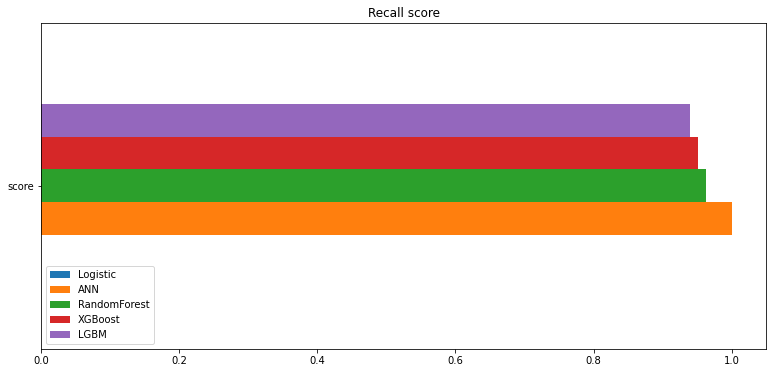

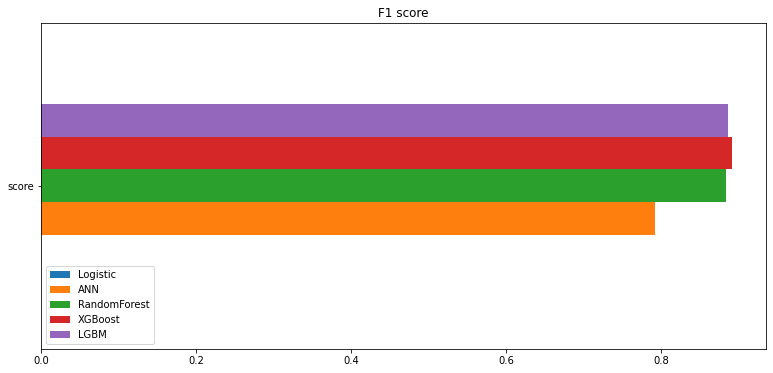

In [ ]:
recall_dic=pd.DataFrame(recall_dic)
f1_dic=pd.DataFrame(f1_dic)

recall_dic.plot(kind='barh', figsize=(13,6))
plt.title('Recall score')

f1_dic.plot(kind='barh', figsize=(13,6))
plt.title('F1 score')


```
Recall 측면에서는 ANN > RandomForest > XGBoost > LGBM > Log ,
f1-score 측면에서는 XGBoost >= LGBM > RandomForest > ANN > Log 순으로 성능이 좋음을을 확인할 수 있습니다. 
```

# OverSampling
```
해당 데이터셋은 매우 imbalance한 데이터이므로 resampling을 시도해볼 필요가 있다고 판단됩니다. 

Fraud를 의미하는 class 1은 전체 데이터에 0.17%밖에 안되므로 
UnderSampling을 하기엔 너무 많은 정보 손실을 가져올 것 같아 OverSampling을 진행합니다.

가장 기본적인 방법인 Random over sampling 과 가장 보편적으로 쓰이는 SMOTE를 사용했습니다. 
```

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state=22)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

print(x_train.shape, y_train.shape)
print(x_train_over.shape, y_train_over.shape)


(227845, 29) (227845, 1)
(454892, 29) (454892,)


### Training & Performance 

In [ ]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=22, n_estimators=300, verbose=0)       
rf_clf.fit(x_train_over, y_train_over)

rf_pred_over= tf.cast(rf_clf.predict(x_test) > 0.5, dtype = tf.float32)
print("Report = \n", classification_report(rf_pred_over, y_test))


#XGBoost
from xgboost import XGBClassifier

xgboost_clf = XGBClassifier(randon_state=22, n_estimators=400, reg_lambda=1)
xgboost_clf.fit(x_train_over, y_train_over, eval_metric='logloss')

xg_pred_over = tf.cast( xgboost_clf.predict(x_test) > 0.5, dtype = tf.float32)
print("Report = \n", classification_report(xg_pred_over, y_test))     


#LightGBM
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=400, num_leaves=64, boost_from_average=False, lambda_l2=1)
lgbm_clf.fit(x_train_over, y_train_over,eval_metric='logloss')

lgbm_pred_over = tf.cast(lgbm_clf.predict(x_test)>0.5, dtype=tf.float32)
print("Report = \n", classification_report(lgbm_pred_over, y_test))

Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56868
         1.0       0.86      0.85      0.86        94

    accuracy                           1.00     56962
   macro avg       0.93      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56676
         1.0       0.90      0.29      0.44       286

    accuracy                           1.00     56962
   macro avg       0.95      0.65      0.72     56962
weighted avg       1.00      1.00      1.00     56962

Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.88      0.85      0.87        96

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.93     56962
weighted avg       1.00      1.00      1.

## RandomOverSampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=22)
x_train_r, y_train_r = ros.fit_resample(x_train, y_train)

### Training & Performance 

In [ ]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=22, n_estimators=300, verbose=0)       
rf_clf.fit(x_train_r, y_train_r)

rf_pred_r= tf.cast(rf_clf.predict(x_test) > 0.5, dtype = tf.float32)
print("Report = \n", classification_report(rf_pred_r, y_test))


#XGBoost
from xgboost import XGBClassifier

xgboost_clf = XGBClassifier(randon_state=22, n_estimators=400, reg_lambda=1)
xgboost_clf.fit(x_train_r, y_train_r, eval_metric='logloss')

xg_pred_r = tf.cast( xgboost_clf.predict(x_test) > 0.5, dtype = tf.float32)
print("Report = \n", classification_report(xg_pred_r, y_test))     


#LightGBM
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=400, num_leaves=64, boost_from_average=False, lambda_l2=1)
lgbm_clf.fit(x_train_r, y_train_r,eval_metric='logloss')

lgbm_pred_r = tf.cast(lgbm_clf.predict(x_test)>0.5, dtype=tf.float32)
print("Report = \n", classification_report(lgbm_pred_r, y_test))

Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56881
         1.0       0.82      0.94      0.87        81

    accuracy                           1.00     56962
   macro avg       0.91      0.97      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56842
         1.0       0.89      0.69      0.78       120

    accuracy                           1.00     56962
   macro avg       0.95      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56874
         1.0       0.87      0.92      0.90        88

    accuracy                           1.00     56962
   macro avg       0.94      0.96      0.95     56962
weighted avg       1.00      1.00      1.

# Conclusion

|     |      |  Precision  | Recall | F1-score |
|:---:|:---:|:---:|:---:|:---:|
| 기본 |RandomForest| 0.82 | 0.96| 0.88 |
|  |XGBoost| 0.84 | 0.95| 0.89 |
|  |LighGBM| 0.84 | 0.94| 0.89 |
| SMOTE |RandomForest| 0.86 | 0.85| 0.86 |
|  |XGBoost| 0.90 | 0.29| 0.44 |
|  |LighGBM| 0.88 | 0.85| 0.87 |
| Random |RandomForest| 0.82 | 0.94| 0.87 |
|  |XGBoost| 0.89 | 0.69| 0.78 |
|  |LighGBM| 0.87 | 0.92| 0.90 |


```
두 가지의 방법으로 Oversampling을 해본 결과, oversampling을 하기 전에 비해 Precision 값은 올랐으나, 
정작 제가 중점으로 둔 Recall과 F1-score 값은 하락했음을 확인할 수 있습니다.

이와 같은 이유로 저의 프로젝트에서는 Resampling을 하지 않은 ANN이나 XGBoost 모델이 가장 성능이 우수했다고 말할 수 있습니다.
```